# Generate some plots for the Tokyo-Tech talk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
n_points = 100
noise_size = 5

regression_function = lambda x: 2*x**3 - x**2 + x

noise = np.random.normal(size=n_points)*noise_size
x_vals = np.random.random(size=n_points)*6-3
y_vals = regression_function(x_vals) + noise

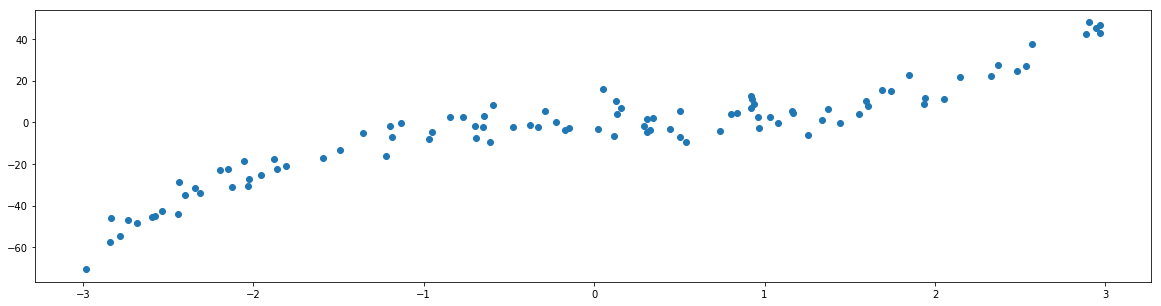

In [4]:
plt.figure(figsize=(20,5))
plt.scatter(x_vals,y_vals)
plt.savefig('Regression.png')

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
regressor = MLPRegressor(hidden_layer_sizes=(1000),activation='logistic',max_iter=10000,solver='adam',alpha=0.1)
regressor.fit(scaler.fit_transform(x_vals.reshape(-1,1)),y_vals)

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
regressor.score(scaler.fit_transform(x_vals.reshape(-1,1)),y_vals)

0.9500309792546389

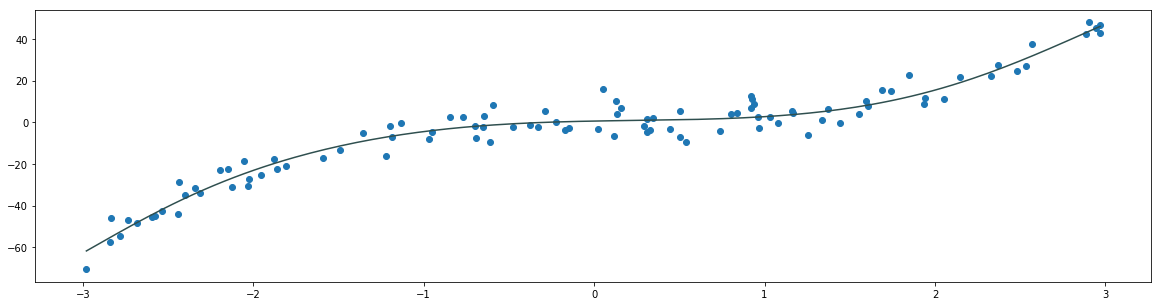

In [8]:
plt.figure(figsize=(20,5))
plt.scatter(x_vals,y_vals)

x_plot = np.linspace(np.min(x_vals),np.max(x_vals),num=200)
plt.plot(x_plot,regressor.predict(scaler.transform(x_plot.reshape(-1,1))),color='darkslategray')

plt.savefig('RegressionFitted.png')